# 8.2 Local Density States

Evaluate the electron density $n(z)$ in the bx assuming that it is in equilibrium with an electrochemical potential $\mu=E_c + 0.25 eV$. The electron density is given by the diagonal elements of the density matrix $\rho$, which we can evaluate in on of the two ways.

1. We could assume periodic boundary conditions: $H(1,100)=H(100,1)=-t_0$ and then evaluate $\rho$ from, 
\begin{align}
[\rho] = f_0([H]-\mu[I])
\end{align}

2. We could add self-energy terms which we have non-zero values of $-t_0 exp[ika]$ only on the end points (1,1) or (100,100), evaluate the Green's function from, 
\begin{align}
G = [(E + i0^+)I - H - \Sigma(E)]^{-1}
\end{align}
obtain the spectral function from $A(E)=i[G(E)-G^+(E)]$, and then calculate the equilibrium density matrix from 
\begin{align}
[\rho] = \int \frac{dE}{2\pi} f_0(E-\mu) [A(E)]
\end{align}


### Model: 
- a one-band Hamiltonian with a lattice of 50 points spaced by $a=2$ angstrom
- effective mass $m_c=0.25m_e$
- $k_B T= 0.025 eV$  

In [47]:
# generation of Figure 8.2.5
import numpy as np
import matplotlib.pyplot as plt
# Constant (all MKS, except energy which is in eV)
hbar=1.06e-34
q=1.6e-19
m=0.25*9.1e-31
mu=0.25
kT=0.025

# inputs 
a=2e-10
t0=(hbar**2)/(2*m*(a**2)*q)
Np=50
X = a*np.linspace(0,Np-1,Np)
U = np.linspace(-0.05,0.05,Np)

H = np.diagflat([[-t0]*(Np-1)],-1) + np.diagflat([[2*t0]*(Np)],0) + np.diagflat([[-t0]*(Np-1)],1)
H = H + np.diag(U)
HP = H

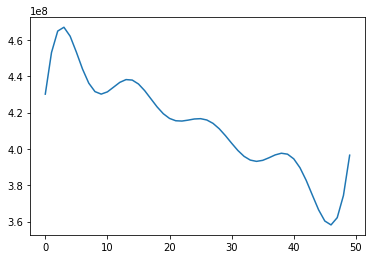

In [74]:
# periodic Hamiltonian 
from numpy.linalg import eigh,eig

HP[0,Np-1] = -t0
HP[Np-1,0] = -t0

D, V = eigh(HP,UPLO='U')
#print(np.diagflat(D,0))

rho = 1./(1+np.exp((D-mu)/kT))
Vprime = np.transpose(np.conjugate(V))
rho = V.dot((np.diag(rho).dot(Vprime)))
rho = np.diag(rho)/a
plt.plot(rho)

In [ ]:
# Green's function method 
from numpy.linalg import inv
import cmath
# Energy Grid for Green's function method 
Emin = -0.1 
Emax = 0.4 
NE = 250 
E = np.linspace(Emin,Emax,NE)
dE = E[2]-E[1]
zplus = complex(0,1e-12)
f = 1/(1+np.exp((E-mu)/kT))

# Green's function method 
sig1 = np.zeros((Np,Np),dtype=np.complex_)
sig2 = np.zeros((Np,Np),dtype=np.complex_)
n = np.zeros((Np,1))

for k in range(0,NE):
    ck = (1-((E[k]+zplus-U[0]))/(2*t0))
    ka = cmath.acos(ck)
    sigma=-t0*complex(np.cos(ka),np.sin(ka))
    sig1[0,0] = sigma
    
    ck = (1-((E[k]+zplus-U[Np-1]))/(2*t0))
    ka = cmath.acos(ck)
    sigma=-t0*complex(np.cos(ka),np.sin(ka))
    sig2[Np-1,Np-1] = sigma
    
    G = inv((E[k]+zplus)*np.eye(Np)-H-sig1-sig2)
    test = ((f[k]*(dE*np.diag(-(G-np.transpose(np.conjugate(G))).imag)/(2*np.pi*a))))[:,None]
    n = n + test

In [ ]:
plt.plot(X,n)
plt.plot(X,rho)

# 8.4 What constitute a contact (reservoir)?

In [191]:
# Energy Grid for Green's function method 
from numpy.linalg import inv

Emin = -1
Emax = 1 
NE = 201 
E = np.linspace(Emin,Emax,NE)
dE = E[2]-E[1]

H = np.array([[-0.25,0.5],[0.5,0.25]])
eta = np.array([[complex(0,0.025),0],[0,complex(0,0.025)]])
D = np.zeros(NE)
for kE in range(0,NE):
    G = inv(np.eye(2)*E[kE] - H + eta)
    A = np.diag(-(G - np.transpose(np.conjugate(G))).imag)
    D[kE] = A[0]

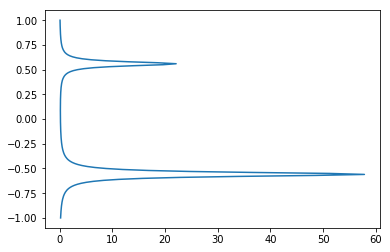

In [192]:
# FIGURE 8.4.1 (left)
plt.plot(D,E)

If we are interested primarily in site 1 we could represent the effect of site 2 through self-energy.
\begin{align*}
\Sigma(E) = \frac{|\tau|^2}{(E - \epsilon_1 + i0^+)}
\end{align*}
and calculate the LDOS from a (1x1) spectral function: 
\begin{align*}
[a] = i[g-g^\dagger]
\end{align*}
where $[g] = [E - \epsilon - \Sigma]^{-1}$

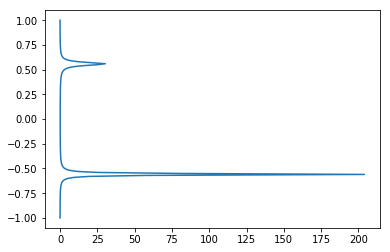

In [216]:
sigma = np.zeros(NE,dtype=np.complex_)
g = np.zeros(NE,dtype=np.complex_)
a = np.zeros(NE,dtype=np.complex_)
for kE in range(0,NE):
    sigma[kE] = (0.5**2)/(E[kE]-0.25+complex(0,0.025))
    g[kE]=1/(E[kE] -(-0.25) - sigma[kE])
    a[kE] = -(g[kE] - np.transpose(np.conjugate(g[kE]))).imag
plt.plot(a.real,E)

What's wrong with the simulation? Why can't they match?

# Exercises

## E.8.2

In [153]:
N = 100
X = np.linspace(-1,3,N)
sigma = np.zeros(N,dtype=np.complex_)
for i,x in enumerate(X): 
    if x <= 0: 
        sigma[i] = (x-1) + np.sqrt(x**2-2*x)
    elif x >= 2: 
        sigma[i] = (x-1) - np.sqrt(x**2-2*x)
    else: 
        sigma[i] = (x-1) - complex(0,np.sqrt(2*x-x**2))

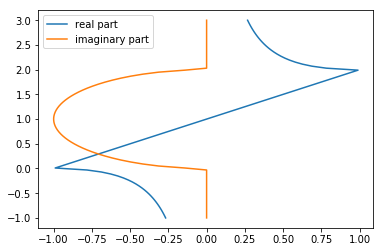

In [156]:
plt.plot(sigma.real,X,label='real part')
plt.plot(sigma.imag,X,label='imaginary part')
plt.legend()